In [72]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from datetime import datetime

In the course of planning previous gatherings during the COVID-19 pandemic, I have had two different discussions with myself and others: "can we gather people safely in the context of this pandemic?" and, "regardless of safety, is it *appropriate* to gather people during the pandemic?". The first is a more quantitative question, while the second is more moral. For the benefit of those who might be invited to gather during COVID-19, I'd like to put forth some thoughts on these topics&mdash;hopefully provoke discussion&mdash;in the order they appear.

It may already seem biased to consider the quantitative safety of gathering before the hierarchically dominant question of whether gathering is approprate *at all*, but I think it better represents the normal decision making process we humans undertake to contextualize larger moral decisions with specific estimates of the risks and benefits of the options.

To decide whether we can gather people "safely" during this COVID-19 pandemic, we first have to acknowledge that any gathering will incur some additional risk of COVID exposure/spread/infection beyond the normal risks inherent in daily (quarantined) life. So the question is *really*, what is the additional risk of exposure/spread/infection posed by gathering and do we feel that that risk is low enough to call a gathering "safe"? It's much easier to work out a number estimate of risk than it is to decide if that number is "low", "high", "scary" or "safe", but we can draw from our own instinct as well as decision making criteria in science to help with that determination.

I argue that the relevant number to estimate is the percent chance that one or more people at a gathering are COVID (+). The main point of quarantine behavior is to avoid contact with COVID (+) people&mdash;that's the only way to assure there is zero chance of having COVID transmitted to you&mdash;, so we ought to try to calculate the probability that we are successful in avoiding COVID (+) people despite gathering together. To begin, let's get some data. As an example, I'll work with data provided for Los Angeles county on their COVID19 Surveillance website (http://dashboard.publichealth.lacounty.gov/covid19_surveillance_dashboard/)

In [73]:
#file downloaded from source above
file = '20201207_LA_County_Covid19_cases_deaths_date_table.csv'

#open the data here
df = pd.read_csv(file)

#get rid of possibly unreliable most recent information
df = df.drop(0, 'index')

In [74]:
def get_date (string):
    """
    This takes a text string date and turns it into a more useful datetime format
    """
    try:
        time = datetime.strptime(string, '%m/%d/%Y')
    except:
        time = datetime.strptime(string, '%Y-%m-%d')
    return time

In [75]:
#convert the dates in the original data to something easier to use
df['date'] = df['date_use'].apply(get_date)

#get rid of unnecessary columns and make it look nice
df = df.drop(["Unnamed: 0", "date_use"], axis=1)
cols = list(df.columns)
df = df[[cols[-1]] + cols[:-1]]

Here's the most recent case and death data from LA county. I've excluded the most recent date's entry (possibly today) since it may be incomplete. We can see a distinct periodicity to the results. Approximately every 7th day (10/18, 10/25, 11/2, 11/8, 11/15, 11/22) there is a drop in confirmed COVID cases for reasons I don't understand and won't try to explain. During the intervening days, case numbers are more or less constant. This trend is broken during Thanksgiving week (11/23-11/29), when we can assume people were either gathering&mdash;"safely" or otherwise&mdash;or having a quarantined Thanksgiving, **not** getting tested. The huge spike in COVID cases observed in the following week (~9k cases on 11/30 and 12/1) may be interpreted as the shifting of the cases we might have observed in Thanksgiving week onto those days, not necessarily a massive travel and unsafe gathering induced case wave.

In [80]:
df.head(14)

,date,total_cases,new_case,avg_cases,total_deaths,new_deaths,avg_deaths
1,2020-12-04,427545,1494,6201.0,7489,10,25.0
2,2020-12-03,426051,5529,6532.0,7479,30,26.0
3,2020-12-02,420522,8964,5924.0,7449,25,25.0
4,2020-12-01,411558,9727,5490.0,7424,35,25.0
5,2020-11-30,401831,9443,4887.0,7389,25,24.0
6,2020-11-29,392388,2550,4261.0,7364,23,26.0
7,2020-11-28,389838,5699,4210.0,7341,26,27.0
8,2020-11-27,384139,3815,3868.0,7315,20,27.0
9,2020-11-26,380324,1273,4019.0,7295,22,27.0
10,2020-11-25,379051,5920,4472.0,7273,24,29.0


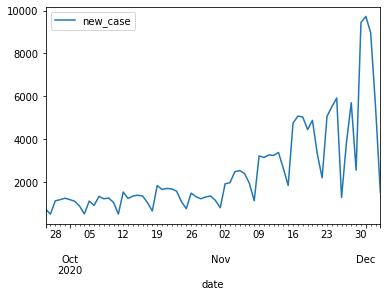

In [88]:
df.head(70).plot(x='date', y='new_case')

In [28]:
#get total number of new cases over last 14 days as number of "active cases" if event was today
tot = 0
for i in range(14):
    num = df.loc[i+1, 'new_case']
    tot+=num

In [29]:
tot

70482

In [30]:
#modifiers of new case numbers, multiplies number of confirmed cases to estimate pre-test probability in total pop
mods = [1, 3, 5, 10]

In [31]:
#roughly LA county population
la_pop= 10*10**6

In [32]:
#pre test probability
pre_prob = tot/la_pop

In [47]:
#group size
sizes = np.linspace(1,30,20)

In [48]:
def prob_nobody_has (rate, group_size):
    
    return (1-(rate))**group_size

In [49]:
full = []
for s in sizes:
    data = {mod: prob_nobody_has(pre_prob*mod, s) for mod in mods}
    full.append(pd.DataFrame(data, np.array([s])))

In [50]:
df = pd.concat(full)

In [51]:
df.index.name = 'group_size'
df.rename_axis("rate_mult", axis="columns", inplace=True)

[[<matplotlib.lines.Line2D at 0x1504894a208>],

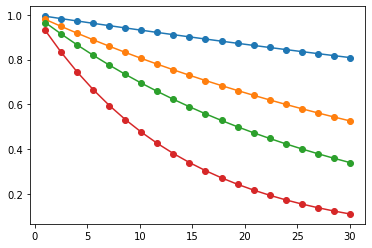

In [52]:
[plt.plot(df.index, df[m], marker='o') for m in mods]